In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv("Batsman_Data.csv")

In [5]:
df.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [6]:
df.dtypes

Unnamed: 0     int64
Bat1          object
Runs          object
BF            object
SR            object
4s            object
6s            object
Opposition    object
Ground        object
Start Date    object
Match_ID      object
Batsman       object
Player_ID      int64
dtype: object

In [8]:
df.drop(df[df.Bat1 == 'DNB'].index,inplace = True)
df.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,6,0*,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,7,0*,0,0,-,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1*,1,3,33.33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
10,11,0*,0,2,0.00,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619
11,12,0,0,2,0.00,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619


In [9]:
df['Bat1'] = df['Bat1'].str.replace('*', '.')
df['SR'] = df['SR'].str.replace('-', '0')
df['Runs'] = df['Runs'].str.replace('-', '0')
df['4s'] = df['4s'].str.replace('-', '0')
df['6s'] = df['6s'].str.replace('-', '0')
df.head()

/var/folders/91/v046yw811g123lvvgwxrhgs80000gn/T/ipykernel_25579/4134432060.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Bat1'] = df['Bat1'].str.replace('*', '.')


,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,6,0.,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,7,0.,0,0,0,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1.,1,3,33.33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
10,11,0.,0,2,0.00,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619
11,12,0,0,2,0.00,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619


In [10]:
#Converting all required columns into float
df['SR']=df['SR'].astype(float)
df['Runs']=df['Runs'].astype(float)
df['4s']=df['4s'].astype(float)
df['6s']=df['6s'].astype(float)

In [11]:
df.dtypes

Unnamed: 0      int64
Bat1           object
Runs          float64
BF             object
SR            float64
4s            float64
6s            float64
Opposition     object
Ground         object
Start Date     object
Match_ID       object
Batsman        object
Player_ID       int64
dtype: object

In [12]:
new = df['Batsman'].value_counts()[:100]
new

MS Dhoni               294
Chris Gayle            288
Shoaib Malik           255
Virat Kohli            222
Ross Taylor            209
                      ... 
Hasan Ali               26
Shimron Hetmyer         25
Andile Phehlukwayo      25
Milinda Siriwardana     24
Kagiso Rabada           24
Name: Batsman, Length: 100, dtype: int64

In [16]:
#Gathering Data of reqd Batsman induvidually
df_induvidual = df.query('Batsman =="Shimron Hetmyer"')
df_induvidual

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
367,368,29,29.0,42,69.04,4.0,0.0,v New Zealand,Whangarei,20 Dec 2017,ODI # 3943,Shimron Hetmyer,670025
368,369,2,2.0,4,50.00,0.0,0.0,v New Zealand,Christchurch,23 Dec 2017,ODI # 3944,Shimron Hetmyer,670025
369,370,127,127.0,93,136.55,14.0,4.0,v U.A.E.,Harare,6 Mar 2018,ODI # 3987,Shimron Hetmyer,670025
370,371,8,8.0,12,66.66,1.0,0.0,v P.N.G.,Harare,8 Mar 2018,ODI # 3991,Shimron Hetmyer,670025
371,372,36,36.0,40,90.00,3.0,1.0,v Ireland,Harare,10 Mar 2018,ODI # 3993,Shimron Hetmyer,670025
372,373,15,15.0,22,68.18,1.0,0.0,v Afghanistan,Harare,15 Mar 2018,ODI # 3997,Shimron Hetmyer,670025
373,374,13,13.0,7,185.71,0.0,1.0,v Zimbabwe,Harare,19 Mar 2018,ODI # 4002,Shimron Hetmyer,670025
374,375,4,4.0,11,36.36,0.0,0.0,v Scotland,Harare,21 Mar 2018,ODI # 4004,Shimron Hetmyer,670025
375,376,38,38.0,51,74.50,3.0,0.0,v Afghanistan,Harare,25 Mar 2018,ODI # 4007,Shimron Hetmyer,670025
376,377,52,52.0,78,66.66,5.0,0.0,v Bangladesh,Providence,22 Jul 2018,ODI # 4022,Shimron Hetmyer,670025


In [17]:
#Gathering some important data from the required Batsman
print("The highest number of score for this batsman is: ")
print(df_induvidual['Runs'].max())
print("The highest Strike Rate for this batsman is: ")
print(df_induvidual['SR'].max())
print("The most number of 4s for this batsman is: ")
print(df_induvidual['4s'].max())
print("The most number of 6s score for this batsman is: ")
print(df_induvidual['6s'].max())

The highest number of score for this batsman is: 
127.0
The highest Strike Rate for this batsman is: 
300.0
The most number of 4s for this batsman is: 
14.0
The most number of 6s score for this batsman is: 
7.0


In [18]:
againstindia = df_induvidual.query('Opposition == "v India"')
againstindia

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
379,380,106,106.0,78,135.89,6.0,6.0,v India,Guwahati,21 Oct 2018,ODI # 4056,Shimron Hetmyer,670025
380,381,94,94.0,64,146.87,4.0,7.0,v India,Visakhapatnam,24 Oct 2018,ODI # 4059,Shimron Hetmyer,670025
381,382,37,37.0,21,176.19,2.0,3.0,v India,Pune,27 Oct 2018,ODI # 4062,Shimron Hetmyer,670025
382,383,13,13.0,11,118.18,2.0,0.0,v India,Mumbai (BS),29 Oct 2018,ODI # 4063,Shimron Hetmyer,670025
383,384,9,9.0,11,81.81,1.0,0.0,v India,Thiruvananthapuram,1 Nov 2018,ODI # 4064,Shimron Hetmyer,670025


<BarContainer object of 5 artists>

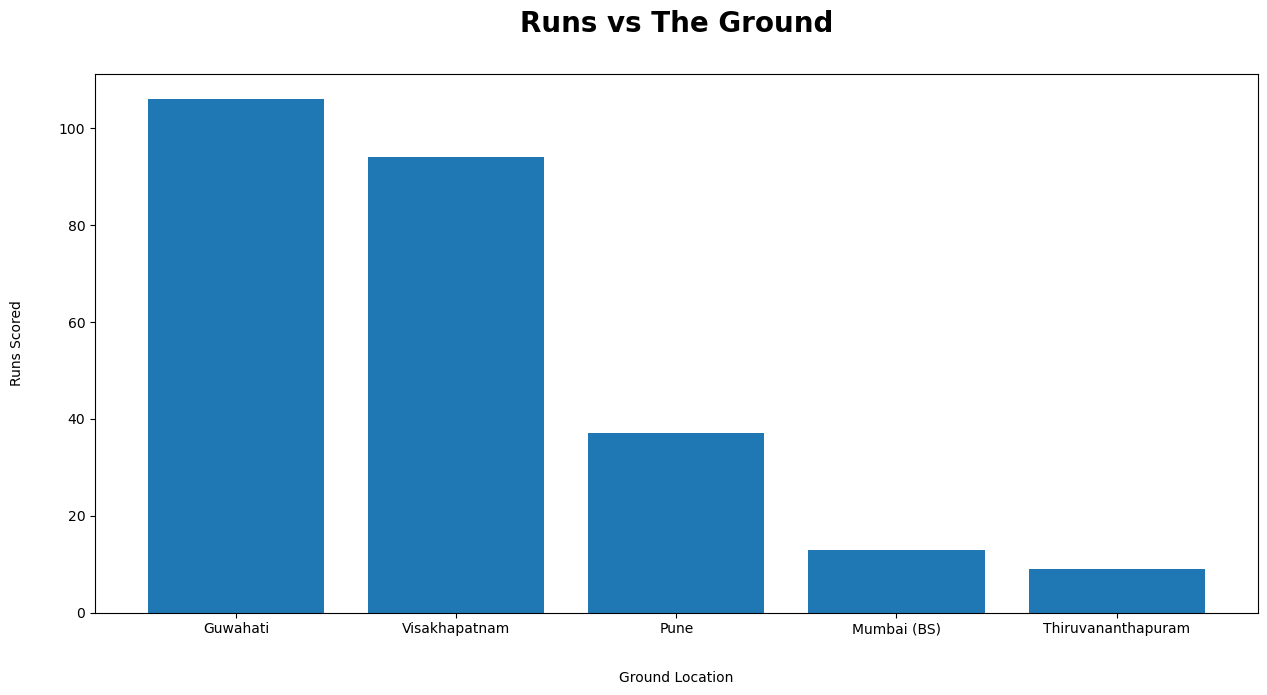

In [19]:
plt.figure(figsize=(15,7))
x = againstindia['Ground']
y = againstindia['Runs']
plt.xlabel('Ground Location', labelpad=25)
plt.ylabel('Runs Scored', labelpad=25)
plt.title('Runs vs The Ground', fontweight='bold', pad=30, fontsize=20)
plt.bar(x, y)

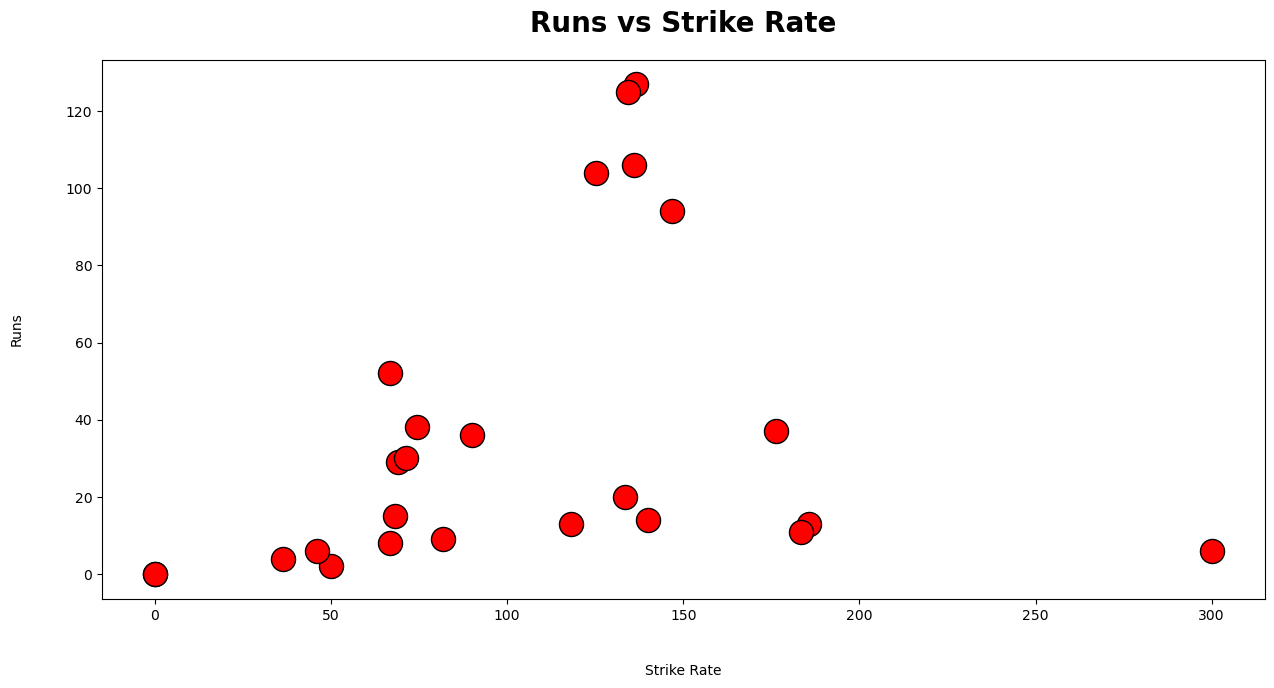

In [21]:
#strike rate vs the score of player in each match
plt.figure(figsize=(15,7))
x = df_induvidual['SR']
y = df_induvidual['Runs']
plt.xlabel('Strike Rate', labelpad=30)
plt.ylabel('Runs', labelpad=30)
plt.title('Runs vs Strike Rate', fontweight='bold', pad=20, fontsize=20)
plt.scatter(x, y, color='red', s=300, edgecolor='black')

In [23]:
df_opposition = df.query('Opposition =="v England"')
df_opposition

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
6,7,0.,0.0,0,0.00,0.0,0.0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1.,1.0,3,33.33,0.0,0.0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
26,27,4.,4.0,5,80.00,0.0,0.0,v England,The Oval,22 May 2014,ODI # 3492,Oshane Thomas,49619
43,44,7,7.0,8,87.50,0.0,0.0,v England,Nottingham,21 Jun 2016,ODI # 3751,Oshane Thomas,49619
45,46,3.,3.0,4,75.00,0.0,0.0,v England,Bristol,26 Jun 2016,ODI # 3755,Oshane Thomas,49619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10284,10285,22,22.0,17,129.41,3.0,1.0,v England,Manchester,24 Jun 2018,ODI # 4013,Aaron Finch,5334
10350,10351,7,7.0,11,63.63,1.0,0.0,v England,Sydney,13 Mar 2015,ODI # 3635,Samiullah Shinwari,318339
10504,10505,12.,12.0,15,80.00,2.0,0.0,v England,Sydney,13 Mar 2015,ODI # 3635,Najibullah Zadran,524049
10704,10705,16,16.0,17,94.11,1.0,1.0,v England,Sydney,13 Mar 2015,ODI # 3635,Mohammad Nabi,25913


In [25]:
#Gathering some important data from the required Batsman
print("The highest number of score against this team is: ")
print(df_opposition['Runs'].max())
print("The highest Strike Rate against this team is: ")
print(df_opposition['SR'].max())
print("The most number of 4s against this team is: ")
print(df_opposition['4s'].max())
print("The most number of 6s against this team is: ")
print(df_opposition['6s'].max())

The highest number of score against this team is: 
189.0
The highest Strike Rate against this team is: 
400.0
The most number of 4s against this team is: 
19.0
The most number of 6s against this team is: 
14.0
